In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})
import matplotlib.pyplot as plt

import eqns

In [43]:
BV0 = [0.46,0.61,0.76,0.92,1.13,1.32,1.41,1.50,1.55,1.61]
BV1 = [0.61,0.75,0.92,1.12,1.31,1.41,1.49,1.55,1.60,1.95]
tau =[1.01, 1.08, 1.18, 1.32, 1.41, 1.49, 1.71, 1.94, 1.97, 2.12]

[ 0.51138488 -0.24907552  1.00734295]


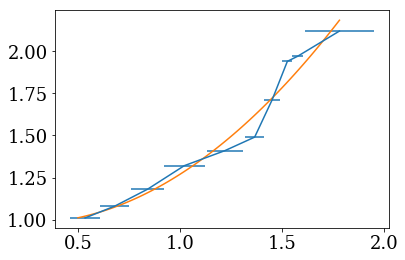

In [44]:
clr = (np.array(BV0) + np.array(BV1)) / 2.

plt.errorbar(clr, np.array(tau), xerr=clr-BV1)
ff = np.polyfit(clr, np.array(tau), 2)
plt.plot(np.arange(0.5,1.8,0.02), np.polyval(ff, np.arange(0.5,1.8,0.02)))

print(ff)

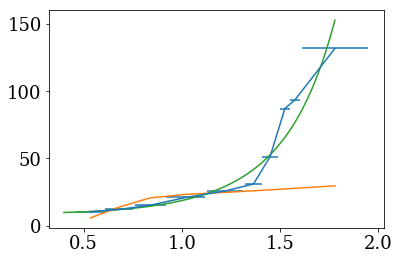

In [45]:
plt.errorbar(clr, 10**np.array(tau), xerr=clr-BV1)
plt.plot(clr, eqns.Noyes1984_eqn4(clr))

plt.plot(np.arange(0.4,1.8,0.02), 10**np.polyval(ff, np.arange(0.4,1.8,0.02)))

In [46]:
# def Wright2011_tau(BV):
#     BV0 = [0.46,0.61,0.76,0.92,1.13,1.32,1.41,1.50,1.55,1.61]
#     BV1 = [0.61,0.75,0.92,1.12,1.31,1.41,1.49,1.55,1.60,1.95]
    
#     clr = (np.array(BV0) + np.array(BV1)) / 2.
    
#     # tau =[1.01, 1.08, 1.18, 1.32, 1.41, 1.49, 1.71, 1.94, 1.97, 2.12]
    
#     ff = [0.51138488, -0.24907552, 1.00734295]
#     tau = 10**np.polyval(ff, BV)
    
#     return tau

In [47]:
plt.plot(np.arange(0.4,1.8,0.02), eqns.Wright2011_tau(np.arange(0.4,1.8,0.02)))

AttributeError: module 'eqns' has no attribute 'Wright2011_tau'

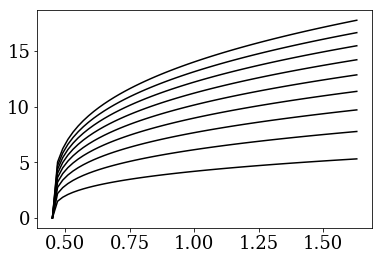

In [48]:
# plots to compare:
# spin-down plot in Rossby Space (color, Ro)

BV = np.arange(0.45, 1.65, 0.02)

t0 = 100
dt = 100
ages = np.arange(t0, 1000, dt)

for k in range(len(ages)):
    plt.plot(BV, eqns.Angus2015(BV,ages[k]), c='k')
# plt.yscale('log')